# TEJAS A

## TASK 1
Prediction using Supervised ML

(Level - Beginner)

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?


## Regression
What Is Regression?

Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).



A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0).

## Simple Linear Regression 
 What is Simple Linear Regression?

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables:



*  One variable, denoted x, is regarded as the predictor, explanatory, or independent variable.
*  
The other variable, denoted y, is regarded as the response, outcome, or dependent variable.





## Supervised learning
Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples.

# TASK
To predict the percentage of the student if the number of hours studied by the student is given using supervised and simple linear regression method

In [3]:
## Importing the library 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

In [8]:
## to read the data from the link 


data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("data was loaded")
print("shape od dataframe is =",data.shape)
data.head()

data was loaded
shape od dataframe is = (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## From the above code we can see that the data  shape is 25 rows and 2 colomns 

In [7]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

## The columns are hours of study and scores 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## The above command we can see the types for hours is float and the score is int 



## Lets plot a and check the relation between them 

Text(0.5, 1.0, 'scatter plot Hours of study vs Score')

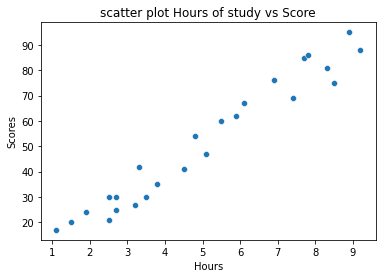

In [12]:
sns.scatterplot(x=data.Hours,y=data.Scores,data=data).set_title("scatter plot Hours of study vs Score")

Text(0.5, 1.0, 'reg plot Hours of study vs Score')

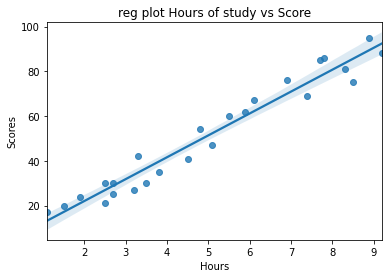

In [54]:
sns.regplot(x=data.Hours,y=data.Scores,data=data).set_title("reg plot Hours of study vs Score")

## From the above graph we can see that there is a linear relation between the Hours and Score

In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## The above function gives the basic statistics of the data like min,max,std ..

In [16]:
(data['Hours']).corr(data['Scores'])

0.9761906560220887

# We can that see  the correlation between the two coloums is almost equal to one which says highly correlated

## Lets start to train the model 
 the independent variable is the Hours and the dependent variable is the Scores as we need to predict the scores

In [27]:
X = data['Hours'].to_numpy().reshape(-1,1) #Independent variable x 
y =data['Scores'].to_numpy().reshape(-1,1)# dependent variable 

## lets split the data to train and test sets using scikit learning  library 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## So the data is split into train and test lets further move to develop the model using regrestion fit from sikit learn

In [30]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [33]:
print("intercept =",reg.intercept_,"coeff is =",reg.coef_)

intercept = [2.69128676] coeff is = [[9.78385439]]


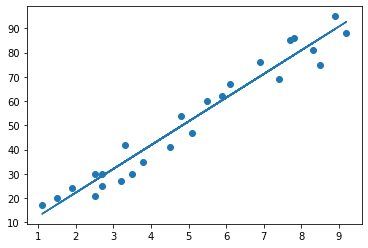

In [34]:
line = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Now lets predict on the test data 

In [53]:
yhat = reg.predict(X_test)
print("pred",yhat)
print("actual",y_test)

pred [[83.89727817]
 [27.15092273]
 [27.15092273]]
actual [[81]
 [30]
 [21]]


## after predicting the lets chek the acuracy of our model 

In [38]:
reg.score(X_test,y_test)

0.974047128713709

## We can see that the acuracy is almost about 97%

## Now lets try to pridict the SCoure for the given hours which is 9.5

In [50]:
hours = np.array([9.25]).reshape(-1,1)
pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.19193983]


# The percentage of a student who studies for 9.5 hourse is 93.1%

In [51]:
#lets try for 8.5
hours = np.array([8.5]).reshape(-1,1)
pred = reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[8.5]]
Predicted Score = [85.85404904]


## Model evaluation 

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("the RMS value is ",mean_squared_error(y_test, yhat))
print("the RMSE value is",mean_squared_error(y_test, yhat, squared=False))
print("the R2 eroor is ",r2_score(y_test, yhat))

the RMS value is  18.1151041578311
the RMSE value is 4.256184225081323
the R2 eroor is  0.974047128713709
